# PhasePro2_6

In [1]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import random
import math 
import logging
plt.style.use('seaborn')

In [2]:
#Import data set
df = pd.read_csv('data\\kc_house_data.csv')
#refined dataset and drop unnecessary column data
df.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'waterfront', 'yr_renovated'], axis=1, inplace=True)
#incorporated lamda to reduce exponential value occurence in describe data below ()
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x) 

In [3]:
#display if any numm values exist in dataset
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
yr_built       0
zipcode        0
dtype: int64

In [4]:
#Show unique values for column data
df.nunique()

price          3622
bedrooms         12
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
condition         5
grade            11
yr_built        116
zipcode          70
dtype: int64

In [5]:
#create the column data
continuous = ['price', 'bedrooms', 'bathrooms', 'grade']
categoricals = ['sqft_living', 'sqft_lot', 'yr_built', 'zipcode', 'floors', 'condition']
df_cont = df[continuous]

In [6]:
# log features
log_names = [f'{column}_log' for column in df_cont.columns]
df_log = np.log(df_cont)
df_log.columns = log_names

In [7]:
#correcting datatypes and describing without exponential ramifications
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x) 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597
mean,"540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,3.41,7.66,"1,971.00","98,077.95"
std,"367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.65,1.17,29.38,53.51
min,78000,1,0.50,370,520,1,1,3,1900,98001
25%,322000,3,1.75,1430,5040,1,3,7,1951,98033
50%,450000,3,2.25,1910,7618,1.50,3,7,1975,98065
75%,645000,4,2.50,2550,10685,2,4,8,1997,98118
max,7700000,33,8,13540,1651359,3.50,5,13,2015,98199


In [8]:
population_mean = df.sqft_living.mean()
population_mean

2080.3218502569803

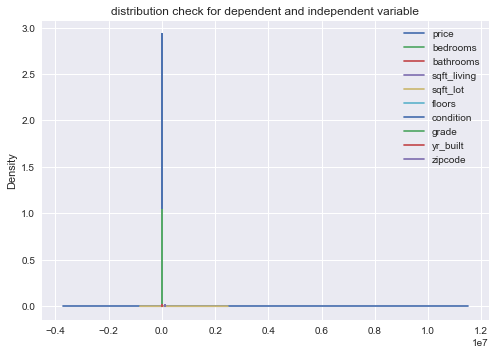

In [9]:
#kernal density plot estimation and distro check
df.plot.kde()
plt.title("distribution check for dependent and independent variable")
plt.show()

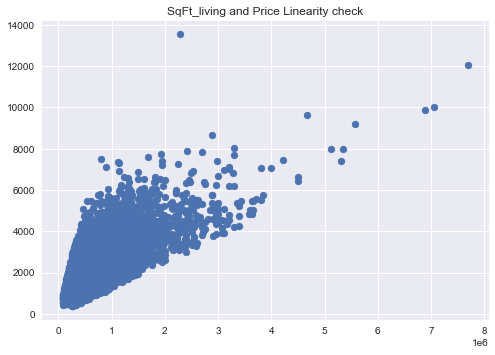

In [10]:
#create a scatter plot to check linearity
plt.scatter(df.price, df.sqft_living)
plt.title("SqFt_living and Price Linearity check")
plt.show()

In [ ]:
#ztest, pval = stests.ztest(data['sqft_living']value = 2080)

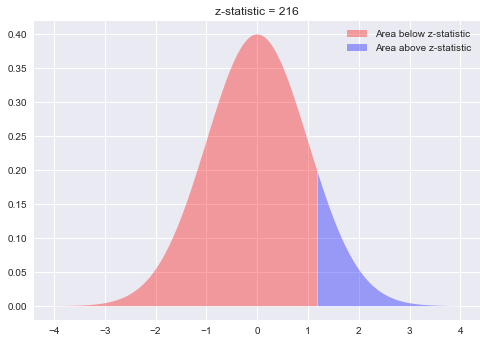

In [12]:
#Visualize z-statistics
plt.fill_between(x=np.arange(-4,1.19,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.19,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(1.19,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.19,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 216');

In [13]:
#Calculate p-value 
stats.norm.cdf(216)

1.0

In [14]:
#display pval with degree of freedon
pval = 1 - stats.norm.cdf(216)
pval

0.0

In [15]:
#clean data review 
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,221900,3,1,1180,5650,1,3,7,1955,98178
1,538000,3,2.25,2570,7242,2,3,7,1951,98125
2,180000,2,1,770,10000,1,3,6,1933,98028
3,604000,4,3,1960,5000,1,5,7,1965,98136
4,510000,3,2,1680,8080,1,3,8,1987,98074


In [16]:
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log.apply(normalize)

In [17]:
# one hot encode categoricals
df_ohe = pd.get_dummies(df[categoricals], prefix=categoricals[0], drop_first=True)
preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)
X = preprocessed.drop('sqft_living', axis=1)
y = preprocessed['sqft_living']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
# A brief preview of train-test split to create test training data and dummy data set
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [21]:
#apply model to the train set created
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [22]:
#calculate training and test MSE
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

216312.20964271665

MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data. The mean squared error is used to determine the model's performance.

In [23]:
##Explore: the data set by deriving statistics and creating visualisation with dummy test data


In [24]:
# Force data as pandas DataFrame to model data validation
def kfolds(data, k):
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size          
    return folds 

In [25]:
#variable decs
df_data = pd.concat([X.reset_index(drop=True), y], axis=1)

In [26]:
df_folds = kfolds(df_data, 5)

In [27]:
test_errs = []
train_errs = []
k=5
for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(df_folds) if i!=n])
    test = df_folds[n]
    # Fit a linear regression model
    linreg.fit(X_train, y_train)
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[225143.92387799395, 225143.92387799395, 225143.92387799395, 225143.92387799395, 225143.92387799395]
[216312.20964271663, 216312.20964271663, 216312.20964271663, 216312.20964271663, 216312.20964271663]


In [28]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [29]:
cv_5_results.mean()

226852.97450995035

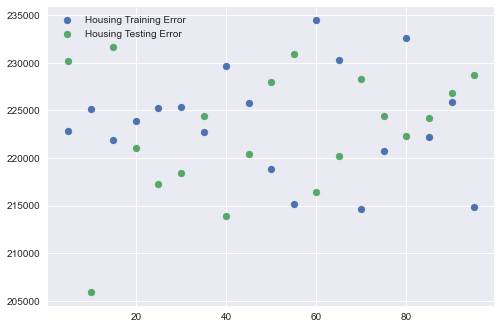

In [30]:
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Housing Training Error')
plt.scatter(t_sizes, test_err, label='Housing Testing Error')
plt.legend()

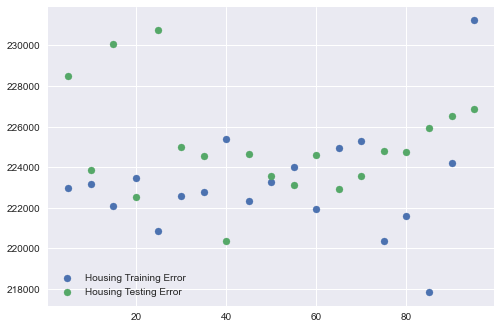

In [31]:
#train set 2 
random.seed(900)

train_err = []
test_err = []
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Housing Training Error')
plt.scatter(t_sizes, test_err, label='Housing Testing Error')
plt.legend()

In [32]:
#Paired sample t-test

df = pd.read_csv('data\\kc_house_data.csv')
df[['price','sqft_living']].describe()
ttest,pval = stats.ttest_rel(df['price'], df['sqft_living'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [33]:
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log.apply(normalize)

In [34]:
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
df_log_norm = df_log.apply(normalize)

In [35]:
# one hot encode categoricals with dummy categoricals
df_ohe = pd.get_dummies(df[categoricals], prefix=categoricals[0], drop_first=True)
preprocessed = pd.concat([df_log_norm, df_ohe], axis=1)
X = preprocessed.drop('sqft_living', axis=1)
y = preprocessed['sqft_living']

In [36]:
# Split the data into training and test sets (assign 20% to test set) Second Sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
# A brief preview of train-test split samples
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [38]:
#from sklearn.linear_model import LinearRegression

In [39]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [40]:
test_residuals = y_hat_test - y_test
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

236100.10173529663